# **Accuracy: The accuracy of the SVM model.**

# **Part 1: Upload questionaire**

In [3]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files

# Step 2: Upload CSV File
print("Upload your CSV file:")
uploaded = files.upload()

# Step 3: Load Dataset
# Replace 'questionnaire.csv' with your uploaded file name
data = pd.read_csv(list(uploaded.keys())[0])

# Step 4: Preview the Dataset
print("Dataset Head:")
print(data.head())

Upload your CSV file:


Saving questionnaire_data.csv to questionnaire_data (1).csv
Dataset Head:
   Response ID Have you ever experienced working from home?  \
0            1                                          Yes   
1            2                                          Yes   
2            3                                           No   
3            4                                          Yes   
4            5                                          Yes   

  Do you think that working from home increases your work productivity?  \
0                                                 No                      
1                                                Yes                      
2                                                Yes                      
3                                                Yes                      
4                                                 No                      

  Do you think that working from home prevents you from going out?  \
0                         

# Part 2: Analyze the *data*

In [4]:
# Step 1: Update Yes/No Questions and Categorical Columns
# Map the full column names to shorter codes for easier handling
yes_no_columns = [
    "Have you ever experienced working from home?",
    "Do you think that working from home increases your work productivity?",
    "Do you think that working from home prevents you from going out?",
    "Do you think that working from home gives you more flexibility?",
    "Do you think that working from home saves you more time?",
    "Do you think that working from home prevents you from getting in contact with people?"
]

categorical_columns = [
    "Which work type has the potential to cause you physical problems, such as the neck, back, and leg pain?",
    "Which work type has the potential to cause mental disorders, such as stress, anxiety, and depression?",
    "Which work type keeps you focused while working?"
]

target_column = "Which work type do you prefer the most?"

# Step 2: Map Yes/No answers to 1/0
for col in yes_no_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Step 3: Encode categorical answers into numerical values
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Step 4: Encode target variable (Preferred Work Type)
data[target_column] = data[target_column].astype('category').cat.codes

# Step 5: Split Dataset into Features and Target
X = data[yes_no_columns + categorical_columns]
y = data[target_column]

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = svm_model.predict(X_test)

# Step 9: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.50      0.38         8
           1       1.00      0.14      0.25         7
           2       0.17      0.20      0.18         5

    accuracy                           0.30        20
   macro avg       0.49      0.28      0.27        20
weighted avg       0.51      0.30      0.29        20



# **Fine Tuning to get higher accuracy**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load data
data = pd.read_csv("questionnaire_data.csv")

# Encode categorical features
encoder = LabelEncoder()

# Encode each column except 'Response ID' (assuming it's an identifier)
for col in data.columns:
    if col != 'Response ID':
        data[col] = encoder.fit_transform(data[col].astype(str))

# Features and target
X = data.drop(columns=['Response ID', 'Which work type do you prefer the most?'])
y = data['Which work type do you prefer the most?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# SVM with GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)
grid.fit(X_train_balanced, y_train_balanced)

# Best parameters
print(f"Best Parameters: {grid.best_params_}")

# Test the model
y_pred = grid.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1,

# **Visualizing the results of the SVM model**
Confusion Matrix: To visualize how well your model classified each class.
Class Distribution Plot: To visualize the distribution of your classes before and after SMOTE balancing.
Model's Prediction Results: To show the comparison between predicted and actual values.

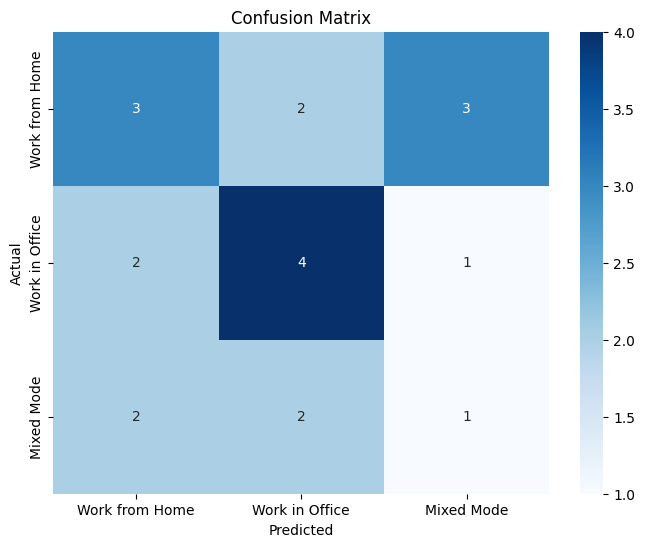

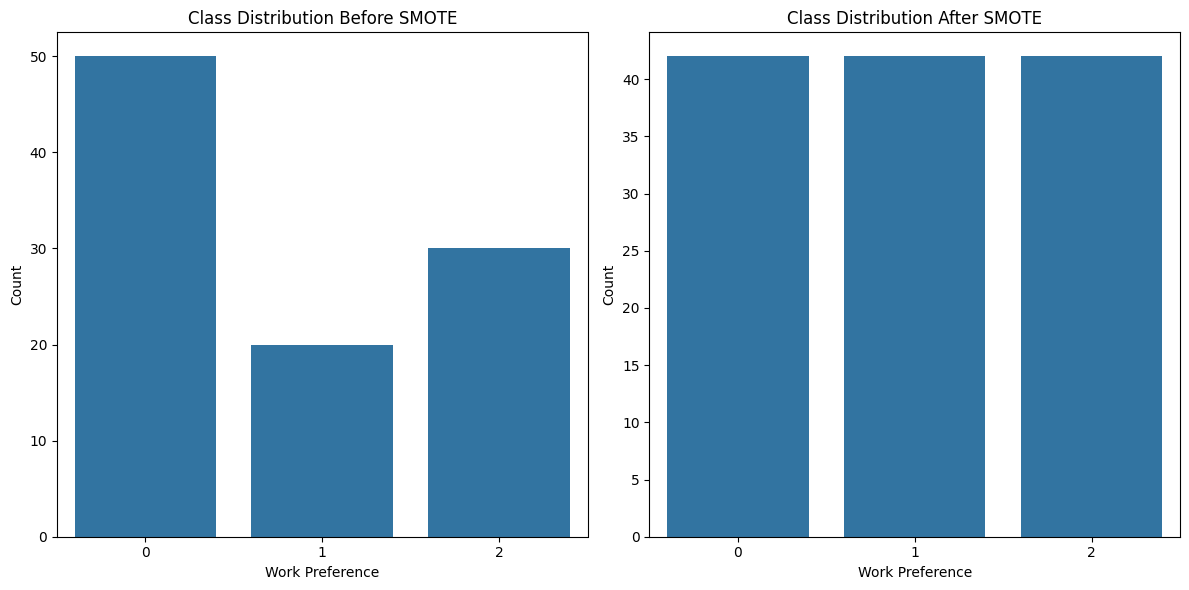

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Work from Home', 'Work in Office', 'Mixed Mode'], yticklabels=['Work from Home', 'Work in Office', 'Mixed Mode'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visualizing Class Distribution Before and After SMOTE
plt.figure(figsize=(12, 6))

# Before SMOTE (original class distribution)
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Work Preference')
plt.ylabel('Count')

# After SMOTE (balanced class distribution)
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Work Preference')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



# **Confusion Matrix Graph:**
If the confusion matrix shows that the "actual work in office" and "predicted work in office" values are the highest, it means that the model is performing better at predicting this specific class. In other words, it is more accurate in classifying instances of "working in an office" than the other classes.
# **Before SMOTE:**
Class Distribution Before SMOTE: The class distribution might be imbalanced, meaning some classes (e.g., "Working from home" or "Working in an office") may have more samples, while others may have fewer. In your case, it seems like the distribution was more diverse, which is quite common in real-world datasets.
# **After SMOTE:**
Class Distribution After SMOTE: SMOTE (Synthetic Minority Over-sampling Technique) works by generating synthetic samples for the minority classes to balance the dataset. After SMOTE, the dataset should have an equal number of samples for each class, and this is why all the bars are the same height in the post-SMOTE visualization.